In [1]:
from typing import Any, Callable, Sequence
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from maze_dataset import MazeDataset, MazeDatasetConfig
from maze_dataset.generation import LatticeMazeGenerators
from maze_dataset.benchmark.percolation_fractions import Result, full_analysis

Testing percolation vals for config 1/2 'g2-perc':   0%|          | 0/16 [00:00<?, ?it/s]

Testing percolation vals for config 1/2 'g2-perc': 100%|██████████| 16/16 [00:00<00:00, 52.74it/s]
Testing percolation vals for config 2/2 'g4-perc': 100%|██████████| 16/16 [00:00<00:00, 26.28it/s]


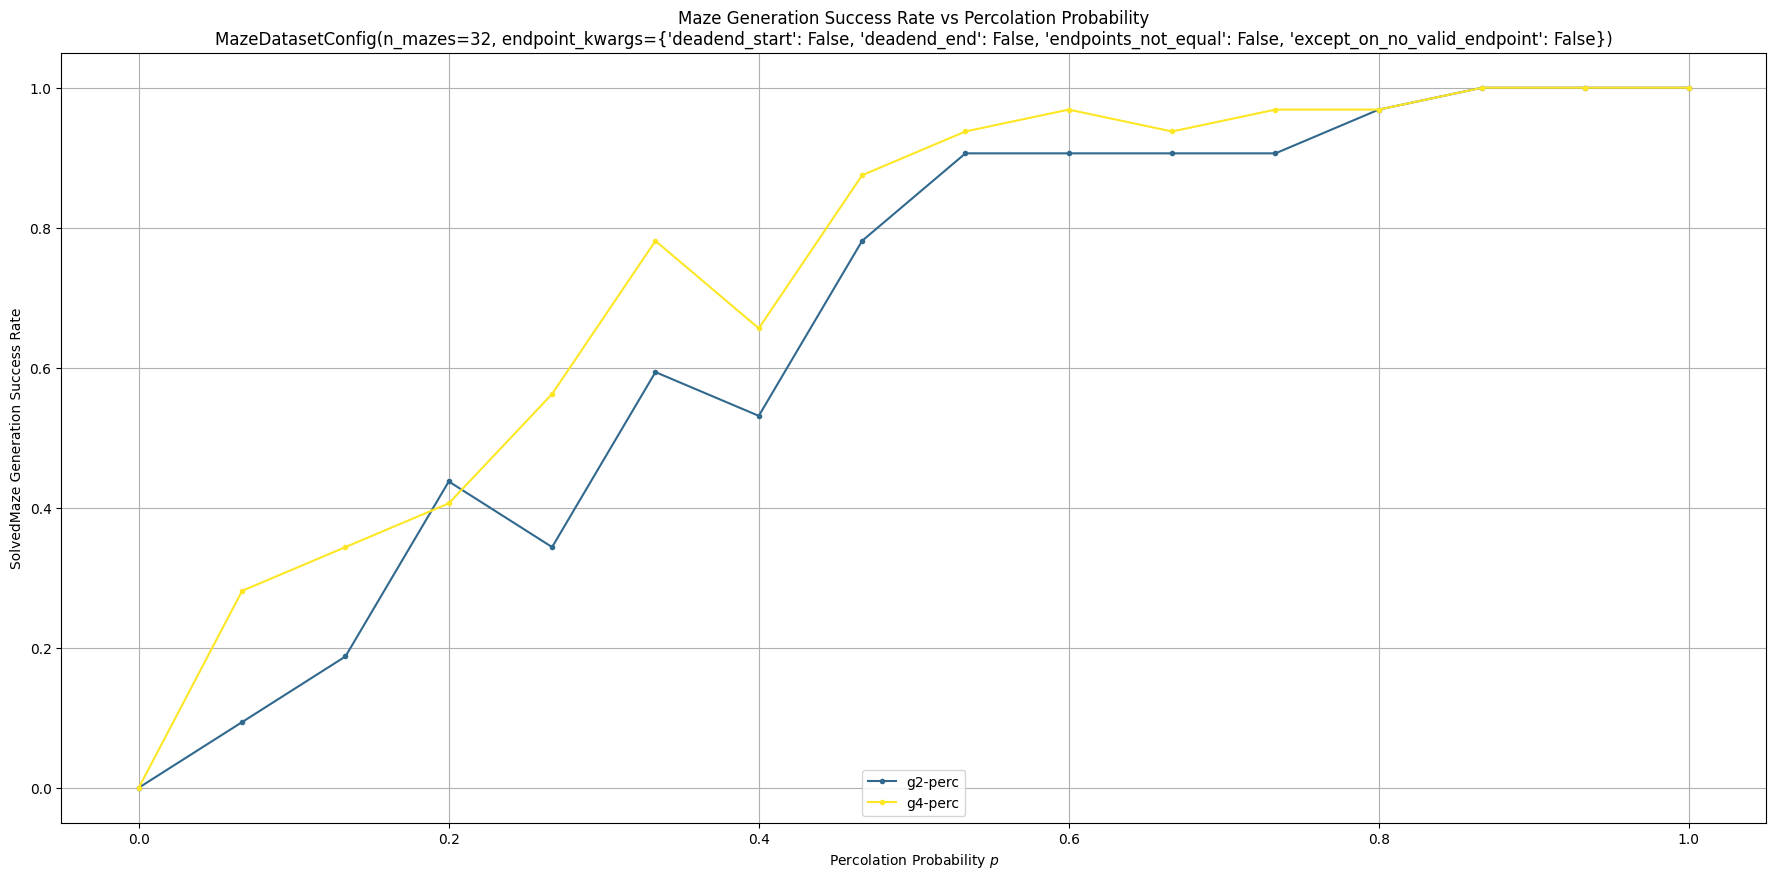

<Axes: title={'center': "Maze Generation Success Rate vs Percolation Probability\nMazeDatasetConfig(n_mazes=32, endpoint_kwargs={'deadend_start': False, 'deadend_end': False, 'endpoints_not_equal': False, 'except_on_no_valid_endpoint': False})"}, xlabel='Percolation Probability $p$', ylabel='SolvedMaze Generation Success Rate'>

In [2]:
# Run the analysis
results: Result = Result.analyze(
    configs=[
        MazeDatasetConfig(
            name=f"g{grid_n}-perc",
            grid_n=grid_n,
            n_mazes=32,
            maze_ctor=LatticeMazeGenerators.gen_percolation,
            maze_ctor_kwargs=dict(),
            endpoint_kwargs=dict(
                deadend_start=False,
                deadend_end=False,
                endpoints_not_equal=False,
                except_on_no_valid_endpoint=False,
            ),
        )
        for grid_n in [2, 4]
    ],
    p_values=np.linspace(0.0, 1.0, 16),
)

# Plot results
results.plot(
    save_path=None, cfg_keys=["n_mazes", "endpoint_kwargs"]
)

In [3]:
print(results.configs_shared())
print(results.configs_differing_keys())

{'__muutils_format__': 'MazeDatasetConfig(SerializableDataclass)', 'seq_len_min': 1, 'seq_len_max': 512, 'seed': 42, 'applied_filters': [], 'n_mazes': 32, 'maze_ctor': {'__name__': 'gen_percolation', '__module__': 'maze_dataset.generation.generators', '__doc__': ['generate a lattice maze using simple percolation', '', '        note that p in the range (0.4, 0.7) gives the most interesting mazes', '', '        # Arguments', '        - `grid_shape: Coord`: the shape of the grid', '        - `lattice_dim: int`: the dimension of the lattice (default: `2`)', '        - `p: float`: the probability of a cell being accessible (default: `0.5`)', '        - `start_coord: Coord | None`: the starting coordinate for the connected component (default: `None` will give a random start)', '        '], 'source_code': ['    @staticmethod', '    def gen_percolation(', '        grid_shape: Coord,', '        p: float = 0.4,', '        lattice_dim: int = 2,', '        start_coord: Coord | None = None,', '    



# Analyzing 1/6: endpoint_kwargs 'any', gen_func=gen_percolation




Testing percolation vals for config 1/3 'g2-perc': 100%|██████████| 16/16 [00:00<00:00, 49.54it/s]
Testing percolation vals for config 2/3 'g4-perc': 100%|██████████| 16/16 [00:00<00:00, 23.67it/s]
Testing percolation vals for config 3/3 'g6-perc': 100%|██████████| 16/16 [00:00<00:00, 16.14it/s]




# Analyzing 2/6: endpoint_kwargs 'any', gen_func=gen_dfs_percolation




Testing percolation vals for config 1/3 'g2-dfs_perc': 100%|██████████| 16/16 [00:00<00:00, 31.61it/s]
Testing percolation vals for config 2/3 'g4-dfs_perc': 100%|██████████| 16/16 [00:01<00:00, 14.35it/s]
Testing percolation vals for config 3/3 'g6-dfs_perc': 100%|██████████| 16/16 [00:02<00:00,  6.69it/s]


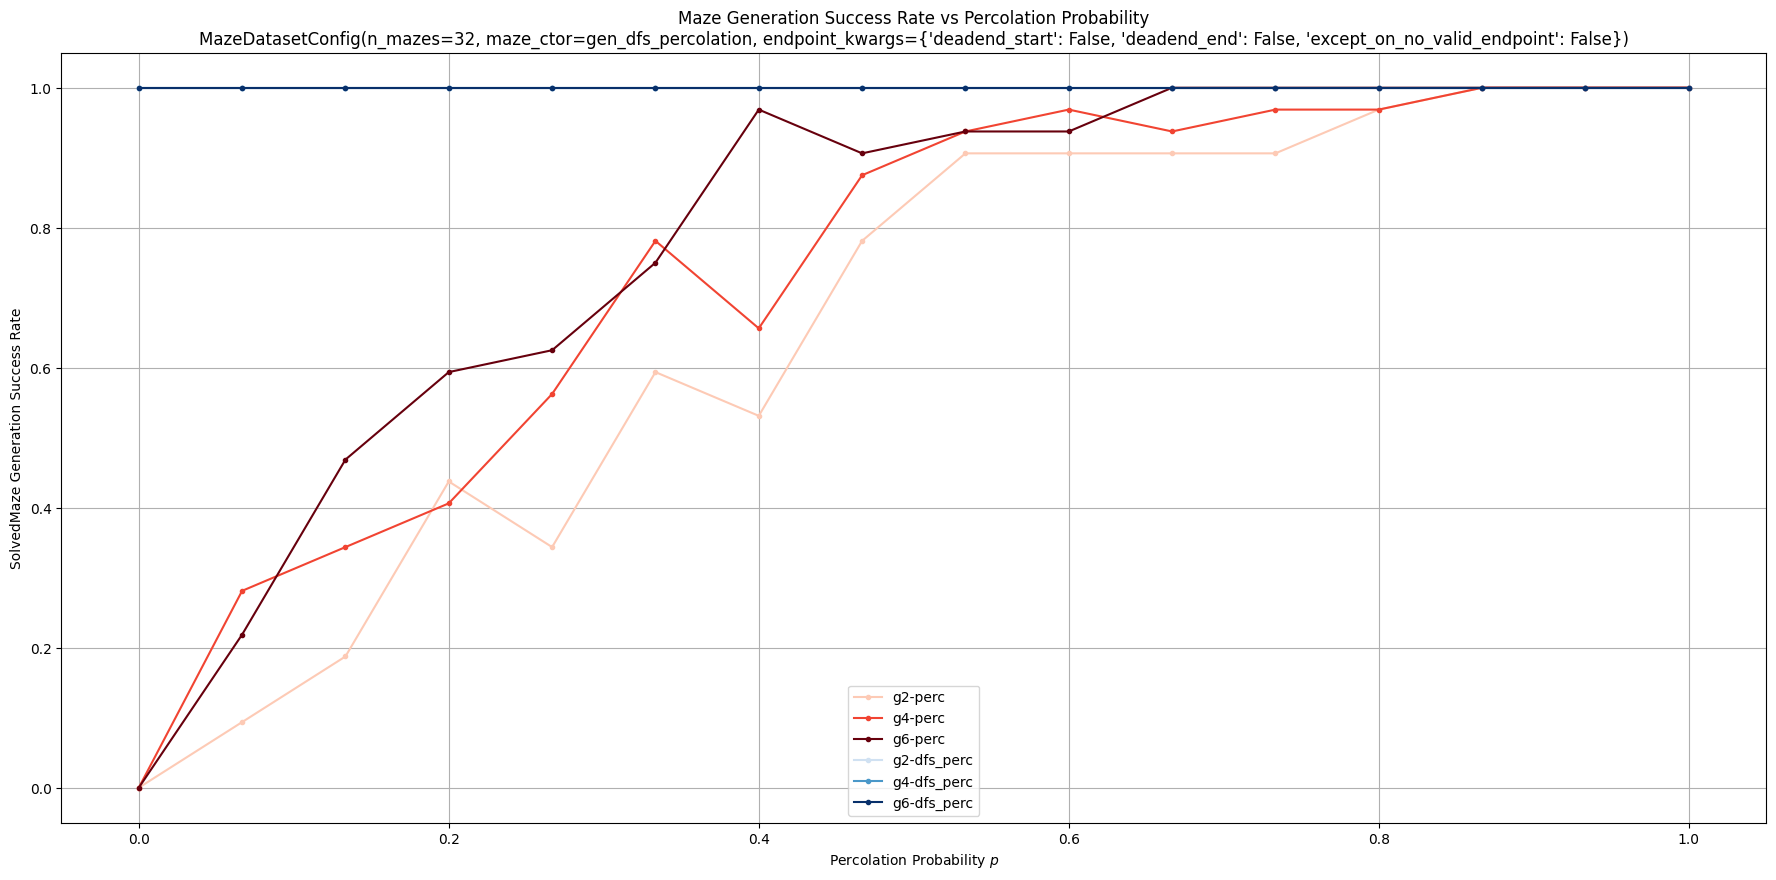



# Analyzing 3/6: endpoint_kwargs 'deadends', gen_func=gen_percolation




Testing percolation vals for config 1/3 'g2-perc': 100%|██████████| 16/16 [00:00<00:00, 39.70it/s]
Testing percolation vals for config 2/3 'g4-perc': 100%|██████████| 16/16 [00:01<00:00, 14.08it/s]
Testing percolation vals for config 3/3 'g6-perc': 100%|██████████| 16/16 [00:02<00:00,  7.78it/s]




# Analyzing 4/6: endpoint_kwargs 'deadends', gen_func=gen_dfs_percolation




Testing percolation vals for config 1/3 'g2-dfs_perc': 100%|██████████| 16/16 [00:00<00:00, 28.01it/s]
Testing percolation vals for config 2/3 'g4-dfs_perc': 100%|██████████| 16/16 [00:01<00:00,  8.81it/s]
Testing percolation vals for config 3/3 'g6-dfs_perc': 100%|██████████| 16/16 [00:03<00:00,  4.12it/s]


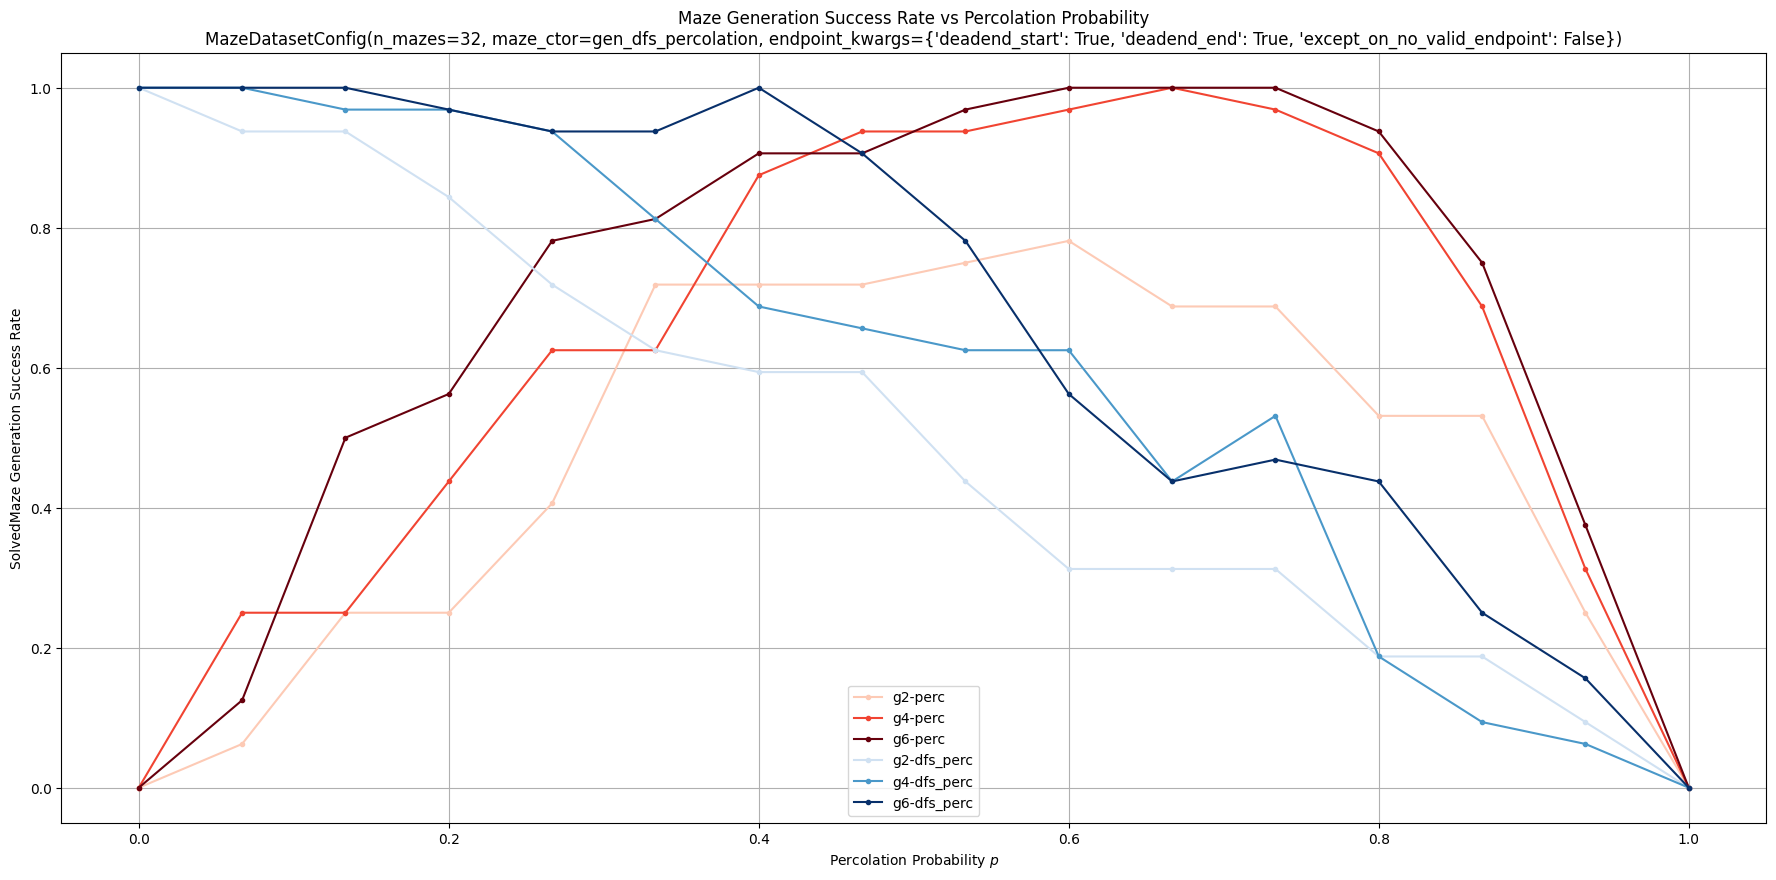



# Analyzing 5/6: endpoint_kwargs 'deadends_unique', gen_func=gen_percolation




Testing percolation vals for config 1/3 'g2-perc': 100%|██████████| 16/16 [00:00<00:00, 44.14it/s]
Testing percolation vals for config 2/3 'g4-perc': 100%|██████████| 16/16 [00:00<00:00, 16.54it/s]
Testing percolation vals for config 3/3 'g6-perc': 100%|██████████| 16/16 [00:01<00:00,  9.14it/s]




# Analyzing 6/6: endpoint_kwargs 'deadends_unique', gen_func=gen_dfs_percolation




Testing percolation vals for config 1/3 'g2-dfs_perc': 100%|██████████| 16/16 [00:00<00:00, 31.81it/s]
Testing percolation vals for config 2/3 'g4-dfs_perc': 100%|██████████| 16/16 [00:01<00:00,  9.22it/s]
Testing percolation vals for config 3/3 'g6-dfs_perc': 100%|██████████| 16/16 [00:04<00:00,  4.00it/s]


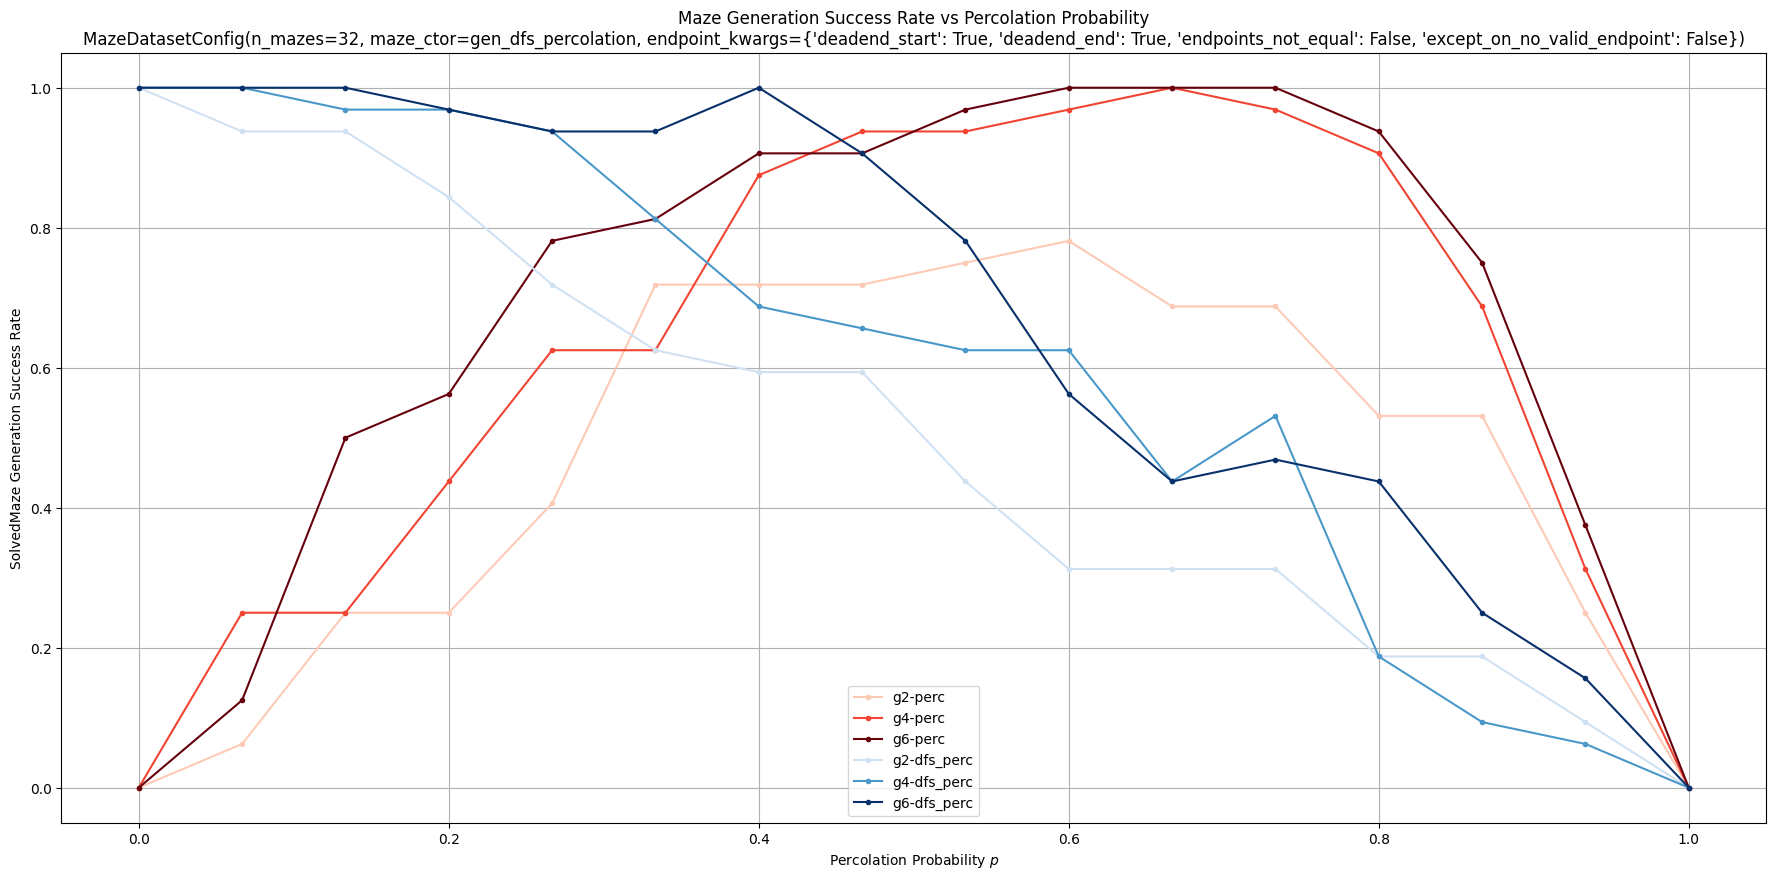

In [4]:
full_analysis(
    n_mazes=32,
    p_val_count=16,
    grid_sizes=[2, 4, 6],
)